In [17]:
import os
import pandas as pd
import numpy as np
import string

from pprint import pprint

os.chdir("/Users/chrtjen/Desktop/STB_CN/Segmentation Analysis_China")

In [18]:
#load final dataset
comments_master = pd.read_csv("dataset to segment_tour.csv", engine='python')

comments_master['Discussion_cleaned'] = [i.split() for i in comments_master['Discussion_cleaned']]

comments_master

,Translated_discussion,"Contains ""tour""",Translated_discussion.1,Translated_discussion.2,WordsCount,id,label_Automotive,label_Automotive>Auto Body Styles,label_Automotive>Auto Body Styles>Off-Road Vehicles,label_Automotive>Auto Body Styles>SUV,...,label_Video Gaming,label_Video Gaming>Video Game Genres>Adventure Video Games,label_Video Gaming>Video Game Genres>Casual Games,label_Video Gaming>Video Game Genres>MMOs,label_Video Gaming>Video Game Genres>Role-Playing Video Games,matched_str,mid,relevance,url,Discussion_cleaned
0,"daily record 177.\n yesterday, i took her to t...",True,"Daily record 177.\n Yesterday, I took her to t...","Daily record 177.\n Yesterday, I took her to t...",124,4.66E+15,0,0,0,0,...,0,0,0,0,0,动物园,4.660000e+15,25000,http://weibo.com/1782793303/KomJ2bUci,"[daily, record, 177, yesterday, zoo, dad, suit..."
1,is there a qinghai 5 ?? japan tour carpool par...,True,Is there a Qinghai 5 ?? Japan Tour Carpool Par...,Is there a Qinghai 5 ?? Japan Tour Carpool Par...,129,4.66E+15,0,0,0,0,...,0,0,0,0,0,旅游,4.660000e+15,20000,http://weibo.com/5532399705/KpFU44JBV,"[qinghai, 5, japan, tour, carpool, partner, as..."
2,"henan's floods, nanjing's epidemic, heilongjia...",True,"Henan's floods, Nanjing's epidemic, Heilongjia...","Henan's floods, Nanjing's epidemic, Heilongjia...",78,4.66E+15,0,0,0,0,...,0,0,0,0,0,江,4.660000e+15,30000,http://weibo.com/6098366125/KqyEA758S,"[henans, flood, nanjings, epidemic, heilongjia..."
3,xiamen tourism · walk into the xiamen tour of ...,True,Xiamen Tourism · Walk into the Xiamen Tour of ...,Xiamen Tourism · Walk into the Xiamen Tour of ...,138,4.66E+15,0,0,0,0,...,0,0,0,0,0,旅游,4.660000e+15,10000,http://weibo.com/7105902279/KpmQ3mcdk,"[xiamen, tourism, ·, walk, xiamen, tour, binha..."
4,chengdu surrounding travel activities chengdu ...,True,Chengdu surrounding travel activities Chengdu ...,Chengdu surrounding travel activities Chengdu ...,126,4.63E+15,0,0,0,0,...,0,0,0,0,0,公园,4.630000e+15,40000,http://weibo.com/6447459993/Ke4hubbYl,"[chengdu, surround, travel, activities, chengd..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,when you lose your hands and wind to attack a ...,True,When you lose your hands and wind to attack a ...,0,49,4.60E+15,0,0,0,0,...,0,0,0,0,0,真实的,4.600000e+15,20000,http://weibo.com/2926737720/K0QfGgIuX,"[lose, hand, wind, attack, palm, ancient, glac..."
1052,# 河 旅游游 # ## 河 小鱼 旅游 包 车 ## 河 极光 之 # # [【10th ...,True,# 河 旅游游 # ## 河 小鱼 旅游 包 车 ## 河 极光 之 # # [【10th ...,0,8,4.66E+15,0,0,0,0,...,0,0,0,0,0,雪,4.660000e+15,20000,http://weibo.com/6856282535/KnrHLhWGy,"[河, 河, 小鱼, 包, 河, 极光, 之, 【10th, large, ring, li..."
1053,yunnan tourism raiders | lijiang album lijiang...,True,Yunnan Tourism Raiders | Lijiang Album Lijiang...,0,6,4.61E+15,0,0,0,0,...,0,0,0,0,0,雪,4.610000e+15,10000,http://weibo.com/3805881503/K62QYgSwL,"[yunnan, tourism, lijiang, album, lijiang, hol..."
1054,[# 游 游 亲 游 游 堆 ## 暑 机 均 均价 has reached 1150 yu...,True,[# 游 游 亲 游 游 堆 ## 暑 机 均 均价 has reached 1150 yu...,0,34,4.60E+15,0,0,0,0,...,0,0,0,0,0,贵,4.600000e+15,30000,http://weibo.com/1662469242/JFaaUplAY,"[亲, 堆, 暑, 均, 均价, reach, 1150, yuan, middle, co..."


In [19]:
#import EDA libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import ngrams
import spacy
from spacy.lang.en import English

#libraries for n-grams and visualisation
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

In [20]:
#combine all comments into one list of words for n-grams analysis
for_ngrams1 = []

for i in range(len(comments_master['Discussion_cleaned'])):
    for x in comments_master['Discussion_cleaned'][i]:
        for_ngrams1.append(x)

for_ngrams1

['daily',
 'record',
 '177',
 'yesterday',
 'zoo',
 'dad',
 'suitable',
 'long',
 'term',
 'outdoor',
 'activities',
 'dad',
 'three',
 'volts',
 'zoo',
 'hot',
 'happy',
 'week',
 'parent',
 'child',
 'tour',
 'wait',
 'weather',
 'cool',
 '娃',
 '养',
 '成',
 'qinghai',
 '5',
 'japan',
 'tour',
 'carpool',
 'partner',
 'aside',
 'august',
 '8th',
 'xining',
 'shi',
 'ning',
 'tone',
 'tone',
 '2',
 '3',
 'people',
 'men',
 'women',
 'limit',
 'ha',
 'current',
 'two',
 'twenties',
 'couple',
 'one',
 'photographer',
 'drive',
 'camera',
 'picture',
 'route',
 'appropriate',
 'discuss',
 'together',
 'self',
 'drive',
 'tour',
 'carpool',
 'henans',
 'flood',
 'nanjings',
 'epidemic',
 'heilongjiang',
 'rainstorm',
 'dalians',
 'disappearance',
 'summer',
 'may',
 'unsuitable',
 'bring',
 'child',
 'play',
 'seaside',
 'parent',
 'child',
 'tour',
 'sad',
 'xiamen',
 'tourism',
 '·',
 'walk',
 'xiamen',
 'tour',
 'binhai',
 'xiamen',
 'write',
 'detail',
 'xiamen',
 'gulangyu',
 'tourism

In [5]:
main_corpus1 = ' '.join(for_ngrams1)

main_corpus1

'环球 travel road 里 林 estimate xinjiang many time way drive painful single dog big beautiful much much 华山 大肉 mark 玩 乌 贼 贼 万 万 风 过 祎 祎 xinjiang self drive tour unfortunately drive good 多 travel rush slow life learn a6ca6zlh chengdu travel guide 嘤 嘤 玩 玩 母 不动 君 君 首 首 首 首 2 people jeep 欧 品 learn drive 里 林 estimate xinjiang many time way painful single dog beautiful many place 祎 祎 xinjiang self drive tour unfortunately drive xiamen brigade youth youth see fanghua youth hit photographer 拍 约 拍 personal film travel photo photo xiamen travel 旅行 sport defepend understandable current global epidemic situation grim everyones safety health 旅行 march travel sichuan tibet line whole process boutique free travel boutique small group hot registration book 3 15 20 27 4 5 10 25 tibet linzhi peach blossom festival 然 乌 湖 旅游行 changlong tourism 西双 版 张 西双 版 张红 美丽 双 beautiful net red card one tell zhuangxi shuangjing wait fight xishuangbanna · shi zhuangxi double view zrchqhp xishuangbanna travel zhang master wei

In [22]:
word_freq1 = Counter(for_ngrams1)
common_words1 = word_freq1.most_common(20)

common_words1

[('tour', 1562),
 ('travel', 971),
 ('day', 465),
 ('qinghai', 382),
 ('tourism', 375),
 ('seven', 325),
 ('guide', 301),
 ('lake', 298),
 ('mountain', 294),
 ('parent', 285),
 ('child', 281),
 ('chengdu', 235),
 ('domestic', 209),
 ('play', 208),
 ('yunnan', 201),
 ('city', 198),
 ('people', 189),
 ('line', 177),
 ('days', 174),
 ('good', 174)]

In [23]:
common_words1.sort(key=lambda x: x[1], reverse=True)

words1_1 = list(zip(*common_words1))[0]
score1_1 = list(zip(*common_words1))[1]
y_pos1_1 = np.arange(len(words1_1))

commonwords1a = list(words1_1)

commonwords1a

['tour',
 'travel',
 'day',
 'qinghai',
 'tourism',
 'seven',
 'guide',
 'lake',
 'mountain',
 'parent',
 'child',
 'chengdu',
 'domestic',
 'play',
 'yunnan',
 'city',
 'people',
 'line',
 'days',
 'good']

In [24]:
unigrams1 = ngrams(for_ngrams1, 1)

unigram_freq1 = Counter(unigrams1)

common_unigrams1 = unigram_freq1.most_common(20)

common_unigrams1

[(('tour',), 1562),
 (('travel',), 971),
 (('day',), 465),
 (('qinghai',), 382),
 (('tourism',), 375),
 (('seven',), 325),
 (('guide',), 301),
 (('lake',), 298),
 (('mountain',), 294),
 (('parent',), 285),
 (('child',), 281),
 (('chengdu',), 235),
 (('domestic',), 209),
 (('play',), 208),
 (('yunnan',), 201),
 (('city',), 198),
 (('people',), 189),
 (('line',), 177),
 (('days',), 174),
 (('good',), 174)]

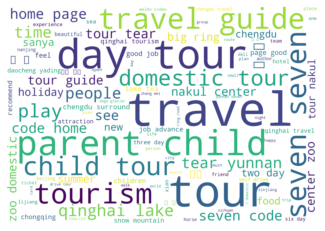

In [25]:
wordcloud1 = WordCloud(width=2000, height=1400, max_words=100, max_font_size=300, background_color="white", relative_scaling=.8).generate(main_corpus1)
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

In [28]:
bigrams1 = ngrams(for_ngrams1, 2)

bigram_freq1 = Counter(bigrams1)

common_bigrams1 = bigram_freq1.most_common(50)

common_bigrams1

[(('day', 'tour'), 308),
 (('parent', 'child'), 254),
 (('travel', 'guide'), 200),
 (('seven', 'seven'), 197),
 (('child', 'tour'), 192),
 (('domestic', 'tour'), 172),
 (('qinghai', 'lake'), 116),
 (('tear', 'yunnan'), 108),
 (('为', '为'), 108),
 (('home', 'page'), 99),
 (('seven', 'code'), 98),
 (('code', 'home'), 98),
 (('tour', 'tear'), 91),
 (('tour', 'guide'), 85),
 (('nakul', 'center'), 80),
 (('center', 'zoo'), 80),
 (('zoo', 'domestic'), 80),
 (('姬', '姬'), 73),
 (('big', 'ring'), 71),
 (('tour', 'nakul'), 66),
 (('chengdu', 'surround'), 64),
 (('lake', 'tea'), 64),
 (('page', 'good'), 63),
 (('good', 'job'), 63),
 (('城市', '城市'), 63),
 (('job', 'advance'), 62),
 (('qinghai', 'tourism'), 60),
 (('迈', '迈'), 60),
 (('snow', 'mountain'), 58),
 (('qinghai', 'travel'), 58),
 (('daocheng', 'yading'), 57),
 (('self', 'drive'), 50),
 (('chengdu', 'travel'), 47),
 (('two', 'day'), 45),
 (('weibo', 'video'), 43),
 (('明', '明'), 41),
 (('ring', 'road'), 38),
 (('yunnan', 'seven'), 38),
 (('da

In [27]:
trigrams1 = ngrams(for_ngrams1, 3)

trigram_freq1 = Counter(trigrams1)

common_trigrams1 = trigram_freq1.most_common(20)

common_trigrams1

[(('parent', 'child', 'tour'), 192),
 (('为', '为', '为'), 104),
 (('seven', 'seven', 'seven'), 98),
 (('seven', 'seven', 'code'), 98),
 (('seven', 'code', 'home'), 98),
 (('code', 'home', 'page'), 98),
 (('domestic', 'tour', 'tear'), 91),
 (('tour', 'tear', 'yunnan'), 91),
 (('nakul', 'center', 'zoo'), 80),
 (('center', 'zoo', 'domestic'), 80),
 (('姬', '姬', '姬'), 72),
 (('domestic', 'tour', 'nakul'), 66),
 (('tour', 'nakul', 'center'), 66),
 (('zoo', 'domestic', 'tour'), 65),
 (('qinghai', 'lake', 'tea'), 64),
 (('home', 'page', 'good'), 63),
 (('page', 'good', 'job'), 62),
 (('good', 'job', 'advance'), 62),
 (('城市', '城市', '城市'), 61),
 (('two', 'day', 'tour'), 44)]